# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

##### The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("C:\\Users\\zhk11\\Desktop\\practice 17\\data\\bank-additional-full.csv", sep = ';')

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [7]:
# replace yes or no with 1 and 0 for target column, which makes it more convenient to use some 'recall' related functions
df['y'].replace(('yes', 'no'), (1, 0), inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

##### There is no missing values for any features. We want to consider using onehotencoder to convert some categorical features to numerical features in later steps.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

##### The business goal  is to find a model that can explain success of a contact, i.e. if the client subscribes the deposit. Such model can increase campaign efficiency by identifying the main  characteristics that affect success, helping in a better  management of the available resources (e.g. human effort,  phone calls, time) and selection of a high quality and affordable set of potential buying customers.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [53]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer

In [54]:
# Using just the bank information features (columns 1 - 7)
df1=df.iloc[:, 0:7]
df1

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes
...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no
41184,46,blue-collar,married,professional.course,no,no,no
41185,56,retired,married,university.degree,no,yes,no
41186,44,technician,married,professional.course,no,no,no


In [55]:
# Explore value counts for eduction, which should be an ordinal variable
df1['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [56]:
# Transform ordinal feature education based on ratings_order
from sklearn.preprocessing import OrdinalEncoder
ratings_order = ['illiterate', 'basic.4y', 'basic.6y','basic.9y','unknown','high.school','university.degree','professional.course']
oe = OrdinalEncoder(categories = [ratings_order], dtype=int)
oe.fit(df1[['education']]);
df1_ord = oe.transform(df1[['education']])
# adding transformed eduction feature (education1) as a new column
encoding_view = df1.assign(education1=df1_ord)
encoding_view

,age,job,marital,education,default,housing,loan,education1
0,56,housemaid,married,basic.4y,no,no,no,1
1,57,services,married,high.school,unknown,no,no,5
2,37,services,married,high.school,no,yes,no,5
3,40,admin.,married,basic.6y,no,no,no,2
4,56,services,married,high.school,no,no,yes,5
...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,7
41184,46,blue-collar,married,professional.course,no,no,no,7
41185,56,retired,married,university.degree,no,yes,no,6
41186,44,technician,married,professional.course,no,no,no,7


In [147]:
# Using OneHotEncoder to transform other categorical features
trans_cols= make_column_transformer((OneHotEncoder(),['job','marital','default','housing','loan']),remainder=StandardScaler())
df2=trans_cols.fit_transform(encoding_view.drop('education',axis=1))
df_transform=pd.DataFrame(df2.toarray(), columns=trans_cols.get_feature_names_out())
df_transform

,onehotencoder__job_admin.,onehotencoder__job_blue-collar,onehotencoder__job_entrepreneur,onehotencoder__job_housemaid,onehotencoder__job_management,onehotencoder__job_retired,onehotencoder__job_self-employed,onehotencoder__job_services,onehotencoder__job_student,onehotencoder__job_technician,...,onehotencoder__default_unknown,onehotencoder__default_yes,onehotencoder__housing_no,onehotencoder__housing_unknown,onehotencoder__housing_yes,onehotencoder__loan_no,onehotencoder__loan_unknown,onehotencoder__loan_yes,remainder__age,remainder__education1
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.533034,-1.963033
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.628993,0.194280
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.290186,0.194280
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.002309,-1.423705
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.533034,0.194280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.164336,1.272937
41184,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.573445,1.272937
41185,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.533034,0.733609
41186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.381527,1.272937


In [149]:
df_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   onehotencoder__job_admin.         41188 non-null  float64
 1   onehotencoder__job_blue-collar    41188 non-null  float64
 2   onehotencoder__job_entrepreneur   41188 non-null  float64
 3   onehotencoder__job_housemaid      41188 non-null  float64
 4   onehotencoder__job_management     41188 non-null  float64
 5   onehotencoder__job_retired        41188 non-null  float64
 6   onehotencoder__job_self-employed  41188 non-null  float64
 7   onehotencoder__job_services       41188 non-null  float64
 8   onehotencoder__job_student        41188 non-null  float64
 9   onehotencoder__job_technician     41188 non-null  float64
 10  onehotencoder__job_unemployed     41188 non-null  float64
 11  onehotencoder__job_unknown        41188 non-null  float64
 12  oneh

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [150]:
# split the data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df_transform, df['y'], random_state =42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [59]:
df['y'].value_counts(normalize=True)

0    0.887346
1    0.112654
Name: y, dtype: float64

Based on the results above, 88.7% of clients didn't subscribe a term deposit. The baseline model would assume all of the clients didn't subscribe, and the baseline performance that our classifier model should have the accuracy as 88.7%.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [132]:
# build the Logistic Regression model
from sklearn.linear_model import LogisticRegression
start = process_time()
lgr_base=LogisticRegression(random_state=42, max_iter = 10000).fit(X_train, y_train)
end = process_time()
# print the run time of logistic regression model
print(end-start)

0.046875


### Problem 9: Score the Model

What is the accuracy of your model?

In [133]:
pipe_1_acc_train = lgr_base.score(X_train, y_train)
pipe_1_acc_test = lgr_base.score(X_test, y_test)
# print the accurary of training set and test set
print(pipe_1_acc_train)
print(pipe_1_acc_test)

0.887119225664433
0.8880256385354958


The accuracy of the training set is 88.7%; the accuracy of test set is 88.9%. The overall accuracy of the simple logistic model is very similar to the basline model, which assumes all of the clients didn't subscribe.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [131]:
# build a knn model using default setting
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from time import process_time
import numpy as np
knn_base= KNeighborsClassifier()
start = process_time()
knn_base.fit(X_train, y_train)
end = process_time()
y_pred = knn_base.predict(X_test)
Train_Accuracy =accuracy_score(y_train,knn_base.predict(X_train))
Test_Accuracy=accuracy_score(y_test,y_pred)
# print the accurary of training set and test set; print run time
print(Train_Accuracy)
print(Test_Accuracy)
print(end-start)

0.8893205140655854
0.876274643099932
0.0


In [130]:
# build a SVM model using default setting
from sklearn.svm import SVC
svc=SVC()
from sklearn.metrics import accuracy_score
svc_base= SVC()
start = process_time()
svc_base.fit(X_train, y_train)
end = process_time()
y_pred = svc_base.predict(X_test)
Train_Accuracy =accuracy_score(y_train,svc_base.predict(X_train))
Test_Accuracy=accuracy_score(y_test,y_pred)
# print the accurary of training set and test set; print run time
print(Train_Accuracy)
print(Test_Accuracy)
print(end-start)

0.8873782007704509
0.8880256385354958
3.328125


In [127]:
# build a decision tree model using default setting
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
tree_base= DecisionTreeClassifier(random_state=42)
start = process_time()
tree_base.fit(X_train, y_train)
end = process_time()
y_pred = tree_base.predict(X_test)
Train_Accuracy =accuracy_score(y_train,tree_base.predict(X_train))
Test_Accuracy=accuracy_score(y_test,y_pred)
# print the accurary of training set and test set; print run time
print(Train_Accuracy)
print(Test_Accuracy)
print(end-start)

0.9169661066329999
0.8634553753520443
0.03125


In [145]:
# summarize the results from different models under defaul base conditions.
res_dict = {'Model': ['KNN', 'Logistic Regression','Decision Tree','SVM'],
            'Train time': [0.00, 0.0469, 0.0312,3.328],
            'Train Accuracy': [0.889, 0.887, 0.917,0.887],
            'Test Accuracy': [0.876, 0.888, 0.863,0.888],
           }
results_df = pd.DataFrame(res_dict).set_index('Model')
results_df

,Train time,Train Accuracy,Test Accuracy
Model,,,
KNN,0.0000,0.889,0.876
Logistic Regression,0.0469,0.887,0.888
Decision Tree,0.0312,0.917,0.863
SVM,3.3280,0.887,0.888


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### Use the first recommended strategy by feature engineering; use all the features rather than only first 7 columns

In [151]:
# add the transformed odirnal feature (education1) based on work above
encoding_view_more = df.assign(education1=df1_ord)
encoding_view_more

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education1
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,5
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,5
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,7
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,7
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,6
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,7


In [62]:
# Using OneHotEncoder to transform all other categorical features
trans_cols= make_column_transformer((OneHotEncoder(),['job','marital','default','housing','loan','contact','month','day_of_week','poutcome']),remainder=StandardScaler())
df3=trans_cols.fit_transform(encoding_view_more.drop(['education','y'],axis=1))
df_transform1=pd.DataFrame(df3, columns=trans_cols.get_feature_names_out())
df_transform1

,onehotencoder__job_admin.,onehotencoder__job_blue-collar,onehotencoder__job_entrepreneur,onehotencoder__job_housemaid,onehotencoder__job_management,onehotencoder__job_retired,onehotencoder__job_self-employed,onehotencoder__job_services,onehotencoder__job_student,onehotencoder__job_technician,...,remainder__duration,remainder__campaign,remainder__pdays,remainder__previous,remainder__emp.var.rate,remainder__cons.price.idx,remainder__cons.conf.idx,remainder__euribor3m,remainder__nr.employed,remainder__education1
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,-1.963033
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0.194280
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0.194280
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,-1.423705
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0.194280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.292025,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1.272937
41184,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.481012,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1.272937
41185,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.267225,-0.204909,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0.733609
41186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.708569,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1.272937


In [152]:
# create a new pandas dataframe which has all the information 
df_transform1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   onehotencoder__job_admin.            41188 non-null  float64
 1   onehotencoder__job_blue-collar       41188 non-null  float64
 2   onehotencoder__job_entrepreneur      41188 non-null  float64
 3   onehotencoder__job_housemaid         41188 non-null  float64
 4   onehotencoder__job_management        41188 non-null  float64
 5   onehotencoder__job_retired           41188 non-null  float64
 6   onehotencoder__job_self-employed     41188 non-null  float64
 7   onehotencoder__job_services          41188 non-null  float64
 8   onehotencoder__job_student           41188 non-null  float64
 9   onehotencoder__job_technician        41188 non-null  float64
 10  onehotencoder__job_unemployed        41188 non-null  float64
 11  onehotencoder__job_unknown  

In [85]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1= train_test_split(df_transform1, df['y'], random_state =42)

In [136]:
# build a decision tree model using default setting with all the information
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
tree_base= DecisionTreeClassifier(random_state=42)
start = process_time()
tree_base.fit(X_train1, y_train1)
end = process_time()
y_pred = tree_base.predict(X_test1)
Train_Accuracy =accuracy_score(y_train1,tree_base.predict(X_train1))
Test_Accuracy=accuracy_score(y_test1,y_pred)
print(Train_Accuracy)
print(Test_Accuracy)
print(end-start)

1.0
0.8847237059337671
0.03125


In [137]:
# build a knn model using default setting with all the information
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn_base= KNeighborsClassifier()
start = process_time()
knn_base.fit(X_train1, y_train1)
end = process_time()
y_pred = knn_base.predict(X_test1)
Train_Accuracy =accuracy_score(y_train1,knn_base.predict(X_train1))
Test_Accuracy=accuracy_score(y_test1,y_pred)
print(Train_Accuracy)
print(Test_Accuracy)
print(end-start)

0.928749473956816
0.9017189472661941
0.0


In [138]:
# build a logistic regression model using default setting with all the information
from sklearn.linear_model import LogisticRegression
start = process_time()
lgr_base=LogisticRegression(random_state=42, max_iter = 10000).fit(X_train1, y_train1)
end = process_time()
print(end-start)

0.1875


In [139]:
# check the accuracy of the logistic regression model
pipe_1_acc_train = lgr_base.score(X_train1, y_train1)
pipe_1_acc_test = lgr_base.score(X_test1, y_test1)
print(pipe_1_acc_train)
print(pipe_1_acc_test)

0.9113657699653621
0.9124987860541905


In [140]:
# build a SVM model using default setting with all the information
from sklearn.svm import SVC
svc=SVC()
from sklearn.metrics import accuracy_score
svc_base= SVC()
start = process_time()
svc_base.fit(X_train1, y_train1)
end = process_time()
y_pred = svc_base.predict(X_test1)
Train_Accuracy =accuracy_score(y_train1,svc_base.predict(X_train1))
Test_Accuracy=accuracy_score(y_test1,y_pred)
print(Train_Accuracy)
print(Test_Accuracy)
print(end-start)

0.9210773364410346
0.9123045547246771
1.328125


In [153]:
# summarize the performance of all the models under default setting but using all the original information
res_dict = {'Model with all features': ['KNN', 'Logistic Regression','Decision Tree','SVM'],
           'Train time': [0.00, 0.188, 0.0312,1.328],
            'Train Accuracy': [0.929, 0.911,1.0, 0.921],
           'Test Accuracy': [0.902, 0.912,0.885, 0.912],
           }
results_df = pd.DataFrame(res_dict).set_index('Model with all features')
results_df

,Train time,Train Accuracy,Test Accuracy
Model with all features,,,
KNN,0.0000,0.929,0.902
Logistic Regression,0.1880,0.911,0.912
Decision Tree,0.0312,1.000,0.885
SVM,1.3280,0.921,0.912


### hyperparameter tuning and grid search and built models based on either accuracy or recall score; accuracy is the default scoring algorithm but recall is probaly more related to the business goal of this task, which is to identify the clients who will subscribe a term deposit.

In [88]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

In [154]:
# Use GridsearchCV to find the best values for hyperparameter n_neighbors in a knn model based on accuracy
knn1_pipe= Pipeline([('knn', KNeighborsClassifier())])
params = {}
knn_grid = ''
best_k = ''

params = {'knn__n_neighbors': range(1, 101, 2)}
knn1_grid = GridSearchCV(knn1_pipe, param_grid=params)
knn1_grid.fit(X_train1, y_train1)

GridSearchCV(estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 101, 2)})

In [155]:
# check the accurary score and best hyperparameter n_neighbors 
best_k = knn1_grid.best_params_['knn__n_neighbors']
from sklearn.metrics import accuracy_score
y_pred = knn1_grid.predict(X_test1)
score1 =accuracy_score(y_train1,knn1_grid.predict(X_train1))
score2 =accuracy_score(y_test1,y_pred)
print(score1)
print(score2)
print(best_k)

0.9130491081544787
0.9089055064581917
23


In [96]:
# Use GridsearchCV to find the best values for hyperparameter n_neighbors in a knn model based on recall
knn1_pipe= Pipeline([('knn', KNeighborsClassifier())])
params = {}
knn_grid = ''
best_k = ''

params = {'knn__n_neighbors': range(1, 101, 2)}
knn1_recall_grid = GridSearchCV(knn1_pipe, param_grid=params, scoring='recall')
knn1_recall_grid.fit(X_train1, y_train1)

HalvingGridSearchCV(estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
                    param_grid={'knn__n_neighbors': range(1, 101, 2)},
                    scoring='recall')

In [99]:
# check the accurary score and best hyperparameter n_neighbors based on recall scoring
best_k = knn1_recall_grid.best_params_['knn__n_neighbors']
y_pred = knn1_recall_grid.predict(X_test1)
score1 =recall_score(y_train1,knn1_recall_grid.predict(X_train1))
score2 =recall_score(y_test1,y_pred)
print(score1)
print(score2)
print(best_k)

1.0
0.4856895056374675
1


In [163]:
# check the mean fit time of knn recall model
knn1_mean_fit_time= knn1_recall_grid.cv_results_['mean_fit_time']
print(np.mean(knn1_mean_fit_time))

0.0024030303955078127


In [158]:
# Use GridsearchCV to find the best values for hyperparameter max_depth in a decision tree model based on accuracy
tree_pipe= Pipeline([('tree', DecisionTreeClassifier(random_state=42))])
params = {'tree__max_depth': range(1, 30)}

tree_grid = GridSearchCV(tree_pipe, param_grid=params)
tree_grid.fit(X_train1, y_train1)
best_k = tree_grid.best_params_['tree__max_depth']
print (best_k)

5


In [159]:
# check the accuracy of the decision tree model
pipe_tree_acc_train = tree_grid.score(X_train1, y_train1)
pipe_tree_acc_test = tree_grid.score(X_test1, y_test1)
print(pipe_tree_acc_train)
print(pipe_tree_acc_test)

0.9171603379625134
0.914829562008352


In [160]:
# Use GridsearchCV to find the best values for hyperparameter max_depth in a decision tree model based on recall
tree_pipe= Pipeline([('tree', DecisionTreeClassifier(random_state=42))])
params = {'tree__max_depth': range(1, 30)}

tree_recall_grid = GridSearchCV(tree_pipe, param_grid=params,scoring='recall')
tree_recall_grid.fit(X_train1, y_train1)
best_k = tree_recall_grid.best_params_['tree__max_depth']
print (best_k)

3


In [161]:
# check the accuracy of the decision tree model
best_k = tree_recall_grid.best_params_['tree__max_depth']
y_pred = tree_recall_grid.predict(X_test1)
score1 =recall_score(y_train1,tree_recall_grid.predict(X_train1))
score2 =recall_score(y_test1,y_pred)
print(score1)
print(score2)
print(best_k)

0.5838829939776312
0.5915004336513443
3


In [164]:
# check the mean fit time of the decision tree recall model
tree_mean_fit_time= tree_recall_grid.cv_results_['mean_fit_time']
print(np.mean(tree_mean_fit_time))

0.13260100792194232


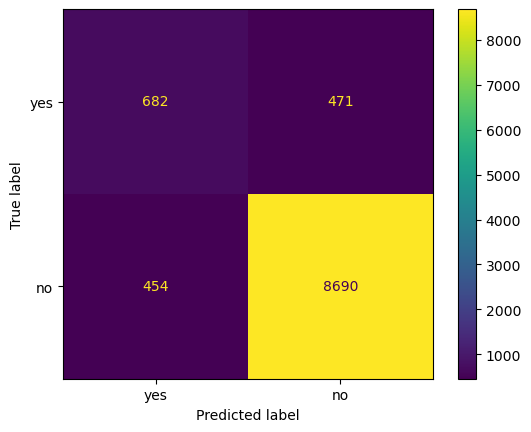

In [165]:
# confusion matrix plot for the results based on best recall score from the decision tree model
y_preds=tree_recall_grid.predict(X_test1);
tree_confusion_mat = confusion_matrix(y_test1, y_preds, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=tree_confusion_mat, display_labels=['yes', 'no' ])
disp.plot()

[Text(0.5, 0.875, 'remainder__nr.employed <= -1.099\ngini = 0.2\nsamples = 30891\nvalue = [27404, 3487]'),
 Text(0.25, 0.625, 'remainder__duration <= -0.358\ngini = 0.494\nsamples = 3743\nvalue = [2071, 1672]'),
 Text(0.125, 0.375, 'remainder__pdays <= -5.115\ngini = 0.276\nsamples = 1354\nvalue = [1130, 224]'),
 Text(0.0625, 0.125, 'gini = 0.479\nsamples = 169\nvalue = [102, 67]'),
 Text(0.1875, 0.125, 'gini = 0.23\nsamples = 1185\nvalue = [1028, 157]'),
 Text(0.375, 0.375, 'remainder__pdays <= -5.061\ngini = 0.477\nsamples = 2389\nvalue = [941, 1448]'),
 Text(0.3125, 0.125, 'gini = 0.305\nsamples = 703\nvalue = [132, 571]'),
 Text(0.4375, 0.125, 'gini = 0.499\nsamples = 1686\nvalue = [809, 877]'),
 Text(0.75, 0.625, 'remainder__duration <= 1.031\ngini = 0.125\nsamples = 27148\nvalue = [25333, 1815]'),
 Text(0.625, 0.375, 'remainder__cons.conf.idx <= -1.328\ngini = 0.051\nsamples = 24238\nvalue = [23605, 633]'),
 Text(0.5625, 0.125, 'gini = 0.295\nsamples = 1798\nvalue = [1475, 323]')

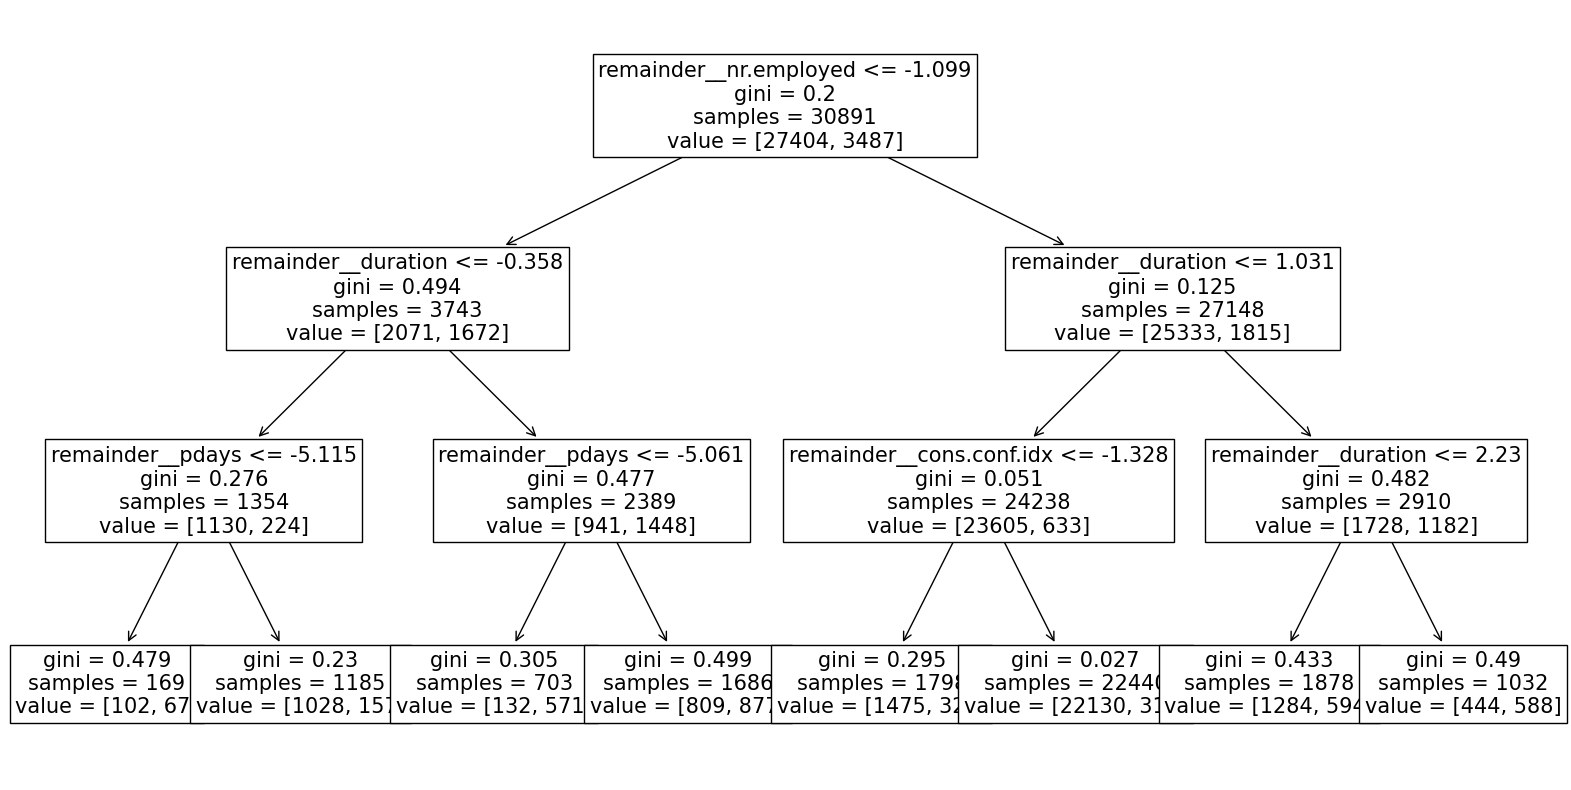

In [187]:
# visualize the decision tree, since the max depth is only 3
from sklearn import tree
import matplotlib.pyplot as plt
best_tree=tree_recall_grid.best_estimator_['tree']
cols_list = X_test1.columns.tolist()
fig, axe = plt.subplots(figsize=(20,10))
tree.plot_tree(best_tree,ax = axe, fontsize=15,feature_names=cols_list)

In [188]:
from sklearn.decomposition import PCA
#SVM is very slow to handle a large dataset, we have to use PCA to reduce the data dimension, which can increase the speed
# Only keep the first 16 dimensions of the data
X_reduced = PCA(n_components=16).fit_transform(df_transform1)
df_reduced=pd.DataFrame(X_reduced)
names=[]
for i in range (0, 16):
    names.append('D'+str(i))    
df_reduced.columns=names
df_reduced

,D0,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
0,-1.477745,1.422961,2.095256,-0.470611,0.355426,-0.549722,0.492251,0.546162,0.558193,-0.136028,0.233914,-0.485388,0.323083,-0.510515,0.113529,-0.563324
1,-1.499121,1.151394,0.860807,-1.152494,-0.086318,-0.436361,-0.459849,1.216386,0.556228,-0.054716,-0.442682,0.979841,-0.143287,-0.062445,0.121000,-0.550566
2,-1.354533,0.385035,-0.349967,-0.507780,0.401484,-0.648397,0.477242,0.670459,-0.729041,0.414314,-0.556793,-0.315603,0.044363,-0.405509,0.009946,-0.620891
3,-1.447606,0.752664,0.795351,-0.169947,0.214845,-1.040966,1.023494,0.455063,0.571160,-0.112371,-0.078167,-0.552216,0.217961,-0.328968,0.912819,-0.329751
4,-1.392343,1.066122,0.605742,-1.092489,0.401772,-0.047730,-0.390526,1.191349,0.473063,-0.042131,-0.156461,-0.198159,1.261398,0.509501,-0.152979,-0.607731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,1.871249,0.109323,1.493581,0.193373,0.014009,0.795733,-3.197902,3.071414,-1.122769,-0.491978,0.772269,-0.732876,-1.005877,0.582063,-0.157245,0.046536
41184,1.825756,-0.738772,0.261178,1.307189,0.574173,0.227138,-1.596081,2.701844,0.236783,-0.838382,0.077067,-0.839205,-1.209148,0.891363,-0.229791,-0.032381
41185,1.811062,-0.401324,0.981649,0.965377,-0.386555,0.231427,-2.064317,2.608706,-1.105013,-0.478455,0.507478,-0.895988,-1.163729,0.726690,-0.103649,0.039382
41186,1.844310,-0.816904,-0.087381,1.228737,0.746233,0.411944,-1.666081,2.751231,0.241936,-0.820730,0.067364,-0.818101,-1.265817,0.901831,-0.536779,-0.123299


In [66]:
# Use GridsearchCV to find the best values for hyperparameters kernel and gammer in SVM model based on accuracy
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_reduced, df['y'], random_state = 42)
params = {'svc__kernel': ['rbf','poly', 'linear', 'sigmoid'],
         'svc__gamma': ['scale', 'auto'],}
svc_pipe= Pipeline([('svc', SVC())])
svc_grid= GridSearchCV(svc_pipe, param_grid=params).fit(X_train_new,y_train_new)

In [67]:
svc_grid.best_params_

{'svc__gamma': 'scale', 'svc__kernel': 'rbf'}

In [68]:
svc_mean_fit_time= svc_grid.cv_results_['mean_fit_time']
print(np.mean(svc_mean_fit_time))

5.634358394145966


In [70]:
# check the accuracy score
y_pred = svc_grid.predict(X_test_new)
score1 =accuracy_score(y_train_new,svc_grid.predict(X_train_new))
score2 =accuracy_score(y_test_new,y_pred)
print(score1)
print(score2)

0.9176782881745492
0.9117218607361367


In [78]:
score1 =recall_score(y_train_new,svc_grid.predict(X_train_new))
score2 =recall_score(y_test_new,y_pred)
print(score1)
print(score2)

0.4270146257527961
0.41283607979184733


In [190]:
# Use GridsearchCV to find the best values for hyperparameters kernel and gammer in SVM model based on recall score
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_reduced, df['y'], random_state = 42)
params = {'svc__kernel': ['rbf','poly', 'linear', 'sigmoid'],
         'svc__gamma': ['scale', 'auto'],}
svc_pipe= Pipeline([('svc', SVC())])
svc_recall_grid= GridSearchCV(svc_pipe, param_grid=params,scoring='recall').fit(X_train_new,y_train_new)

In [191]:
# check the recall score of the SVM model based on recall score optimization
y_pred = svc_grid.predict(X_test_new)
score1 =recall_score(y_train_new,svc_recall_grid.predict(X_train_new))
score2 =recall_score(y_test_new,y_pred)
print(score1)
print(score2)

0.4273014052193863
0.41283607979184733


In [192]:
# check mean fit time of the SVM recall model
svc_mean_fit_time= svc_recall_grid.cv_results_['mean_fit_time']
print(np.mean(svc_mean_fit_time))

5.4143600225448605


In [111]:
## Use GridsearchCV to find the best values for hyperparameters penalty and C in a logistic regression model based on accuracy
lgr_pipe= Pipeline([('lgr', LogisticRegression(solver = 'liblinear', random_state=42, max_iter = 10000))])
params = {'lgr__penalty':['l1','l2'], 'lgr__C': [0.01,0.1,1,10]}
lgr_grid = GridSearchCV(lgr_pipe, param_grid=params)
lgr_grid.fit(X_train1, y_train1)
# check accuracy score
pipe_1_acc_train = lgr_grid.score(X_train1, y_train1)
pipe_1_acc_test = lgr_grid.score(X_test1, y_test1)
print(pipe_1_acc_train)
print(pipe_1_acc_test)

0.9113657699653621
0.9121103233951636


In [185]:
lgr_grid.best_params_

{'lgr__C': 1, 'lgr__penalty': 'l1'}

In [186]:
# L1 regularization can perform feature selection; check the contribution of different features in this lgr model
best_estimator1 = lgr_grid.best_estimator_
best_model1 = lgr_grid.best_estimator_.named_steps['lgr']
feature_names = X_train1.columns
coefs_lasso = best_model1.coef_
print(feature_names)
print(coefs_lasso)

Index(['onehotencoder__job_admin.', 'onehotencoder__job_blue-collar',
       'onehotencoder__job_entrepreneur', 'onehotencoder__job_housemaid',
       'onehotencoder__job_management', 'onehotencoder__job_retired',
       'onehotencoder__job_self-employed', 'onehotencoder__job_services',
       'onehotencoder__job_student', 'onehotencoder__job_technician',
       'onehotencoder__job_unemployed', 'onehotencoder__job_unknown',
       'onehotencoder__marital_divorced', 'onehotencoder__marital_married',
       'onehotencoder__marital_single', 'onehotencoder__marital_unknown',
       'onehotencoder__default_no', 'onehotencoder__default_unknown',
       'onehotencoder__default_yes', 'onehotencoder__housing_no',
       'onehotencoder__housing_unknown', 'onehotencoder__housing_yes',
       'onehotencoder__loan_no', 'onehotencoder__loan_unknown',
       'onehotencoder__loan_yes', 'onehotencoder__contact_cellular',
       'onehotencoder__contact_telephone', 'onehotencoder__month_apr',
       'one

Summarize the coefficience of different features to get a sense about the contribtuion of differnet features.

In [195]:
pd2=pd.DataFrame.from_dict({'feature_names':feature_names,'coef':coefs_lasso[0]})
pd2['abs_coef']=abs(pd2.coef)
pd2

,feature_names,coef,abs_coef
0,onehotencoder__job_admin.,0.070523,0.070523
1,onehotencoder__job_blue-collar,-0.172884,0.172884
2,onehotencoder__job_entrepreneur,-0.113807,0.113807
3,onehotencoder__job_housemaid,-0.118648,0.118648
4,onehotencoder__job_management,0.000000,0.000000
5,onehotencoder__job_retired,0.244605,0.244605
6,onehotencoder__job_self-employed,-0.196264,0.196264
7,onehotencoder__job_services,-0.115245,0.115245
8,onehotencoder__job_student,0.117074,0.117074
9,onehotencoder__job_technician,0.053350,0.053350


In [112]:
## Use GridsearchCV to find the best values for hyperparameters penalty and C in a logistic regression model based on recall score
lgr_pipe= Pipeline([('lgr', LogisticRegression(solver = 'liblinear', random_state=42, max_iter = 10000))])
params = {'lgr__penalty':['l1','l2'], 'lgr__C': [0.01,0.1,1,10]}
lgr_recall_grid = GridSearchCV(lgr_pipe, param_grid=params,scoring='recall')
lgr_recall_grid.fit(X_train1, y_train1)
# check recall score
score1 =recall_score(y_train1,lgr_recall_grid.predict(X_train1))
score2 =recall_score(y_test1,lgr_recall_grid.predict(X_test1))
print(score1)
print(score2)

0.4232864926871236
0.4319167389418907


In [113]:
lgr_recall_grid.best_params_

{'lgr__C': 10, 'lgr__penalty': 'l2'}

In [193]:
# check mean fit time of the lgr recall model
svc_mean_fit_time= lgr_recall_grid.cv_results_['mean_fit_time']
print(np.mean(svc_mean_fit_time))

0.5501186668872833


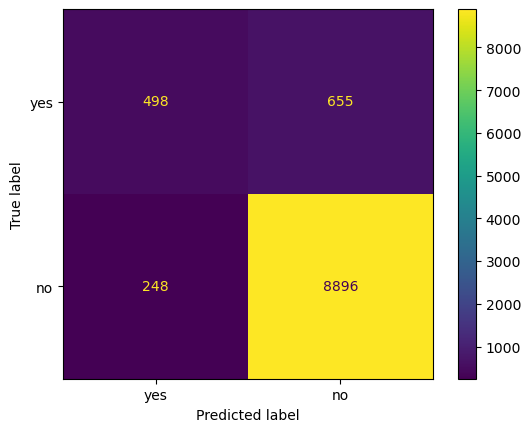

In [115]:
# confusion plot of the logistic regression model based on best recall score
y_preds=lgr_recall_grid.predict(X_test1);
lgr_confusion_mat = confusion_matrix(y_test1, y_preds, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=lgr_confusion_mat, display_labels=['yes', 'no' ])
disp.plot()

In [194]:
# summarize the results from different models using Gridsearch CV for best recall score.
res_dict = {'Model': ['KNN', 'Logistic Regression','Decision Tree','SVM'],
            'Train time': [0.0024, 0.55, 0.133,5.41],
            'Train Recall': [1, 0.423, 0.584,0.427],
            'Test Recall': [0.485, 0.432, 0.592,0.413],
           }
results_df = pd.DataFrame(res_dict).set_index('Model')
results_df

,Train time,Train Recall,Test Recall
Model,,,
KNN,0.0024,1.000,0.485
Logistic Regression,0.5500,0.423,0.432
Decision Tree,0.1330,0.584,0.592
SVM,5.4100,0.427,0.413


### conclusion
### 1 Decision tree model works best for the imbalanced dataset; Decision Tree model can give rise to best recall score and also it works relatively fast.
### 2 SVM model works really slow for such a large dataset; it may be important to reduce the dimensionality of the dataset using PCA to increase the speed.
### 3 Knn model works fast and performs well.
### 4 Including more features particularly these numerical features in the model can increase the overall accuracy.
### 5. Based on logistic regression model with L1 regularizaiton, the most predictive features include duration, emp.var.rate, cons.price.idx, euribor3m, poutcome_failure.

##### Questions